In [12]:
PATH = "/home/neo/scripts/chn@git/DataFrameTools"

In [16]:
PATH = "/home/neo/scripts/chn@git/NetworkPlot" # <-- optional if running from native path

In [17]:
import importlib.util, os

if not os.path.isdir(PATH):
    PATH = os.getcwd()
PATH = os.path.realpath(PATH)

spec = importlib.util.spec_from_file_location("__init__", PATH+'/__init__.py')
init = importlib.util.module_from_spec(spec)
spec.loader.exec_module(init)

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
#import metaknowledge as mk # <-- required for citation network
#import networkx as nx # <-- required for random graph
from normalize import *
from dflib import *
from NetworkPlot import NetworkPlot
from nxlib import nx_readgraph, nx_readfile

In [4]:
graph_file = "/home/neo/workspace/wiki-ds/level3-ds.gexf"

G = nx_readgraph(graph_file)

In [25]:
df = pd.read_csv("/home/neo/workspace/wiki-ds/WikipediaNetwork/d3/CENTRALITY.csv")

In [111]:
df.sort_values('betweenness', ascending=False)[:50]

,id,degree,in_degree,out_degree,clustering,closeness,eigenvector,betweenness,brokering,bridgeness,partition,name,cat
id,,,,,,,,,,,,,
Wayback Machine,Wayback Machine,261,150.0,111,0.080,0.826,0.002,1.000,0.419,0.026,1,29,1
World Wide Web,World Wide Web,230,188.0,42,0.033,0.861,0.017,0.341,0.388,0.033,1,34,1
Internet Archive,Internet Archive,543,488.0,55,0.030,0.802,0.001,0.282,0.919,0.007,2,1,2
Data mining,Data mining,416,330.0,86,0.145,0.936,0.977,0.273,0.620,0.013,3,17,3
Computer science,Computer science,357,322.0,35,0.027,0.900,0.111,0.263,0.606,0.024,3,20,3
Machine learning,Machine learning,473,382.0,91,0.121,0.930,0.990,0.251,0.725,0.011,3,11,3
Statistics,Statistics,481,432.0,49,0.041,0.852,0.123,0.226,0.804,0.009,5,9,5
International Standard Book Number,International Standard Book Number,261,76.0,185,0.085,0.605,0.000,0.221,0.417,0.003,1,28,1
Glossary of artificial intelligence,Glossary of artificial intelligence,598,525.0,73,0.041,1.000,0.439,0.169,1.000,0.009,3,0,3


In [41]:
Df_modules

,nodes,edges,density,degree,in_degree,out_degree,clustering,closeness,eigenvector,betweenness,brokering,bridgeness,cat
id,,,,,,,,,,,,,
4,62.0,3781.0,0.999736,25.000000,25.000000,25.000000,240.921,57.336,61.677,0.614,9.121,0.143,4
1,0.0,0.0,0.000000,23.738451,23.209093,24.324938,185.989,92.644,0.162,3.132,18.086,5.514,1
5,3.0,6.0,1.000000,21.850990,21.255617,22.510616,269.030,11.003,4.008,0.584,10.463,0.060,5
3,3.0,6.0,1.000000,19.616186,19.422416,19.830868,191.424,16.509,4.083,1.286,8.704,0.637,3
2,0.0,0.0,0.000000,19.457798,19.085382,19.870406,335.846,7.095,0.006,0.566,6.871,0.113,2
6,0.0,0.0,0.000000,16.817992,16.698388,16.950505,53.214,11.451,0.038,0.297,3.994,0.562,6
0,0.0,0.0,0.000000,16.444251,16.407613,16.484844,101.014,4.803,0.017,0.377,2.799,0.406,0


In [87]:
Df, Df_modules, H = NetworkPlot(G,
            df=df,
            k=4,
            #show_labels=True,
            max_labels=10,
            layout='forceatlas2',
            it=500,
            deg=True,
            clu=True,
            clo=True,
            eig=True,
            bet=True,
            bri=True,
            bro=True,
            mod=True,#name='Clube rico (n=105)',
            renderer='ds_bundled',
            normalized=True,
            max_nodes=None,
            max_modules=7,
            plot_modules=True,
            output_folder='d3')

Loaded 38746 nodes and 72796 connections.
Filtering by k-core (k=4)...
Got 2709 nodes (6.99%).
Filtering top 7 modules...
Got 2709 nodes (100.00%).


/media/data/scripts/chn@git/NetworkPlot/dflib.py:64: RuntimeWarning:

invalid value encountered in double_scalars



Layout set as 'forceatlas2'.
Rendering network...
Layout => 3.79s. 1...
Layout => 9.82s. 2...
Layout => 4.20s. 3...
Layout => 5.09s. 4...
Layout => 5.05s. 5...
Layout => 2.59s. 6...
Layout => 2.26s. 7...
Finished in 58.11s.



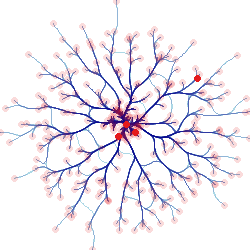
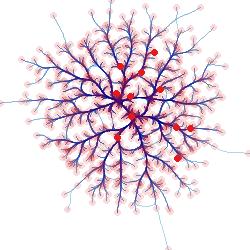
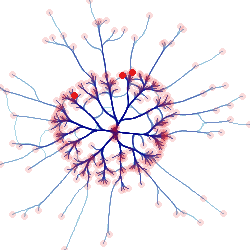
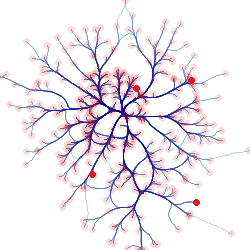
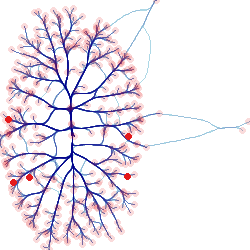
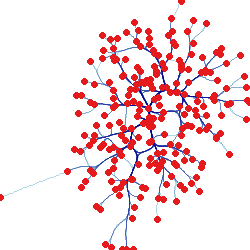
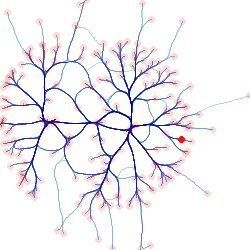

In [89]:
from dslib import tf_plot
tf_plot(H, 2)

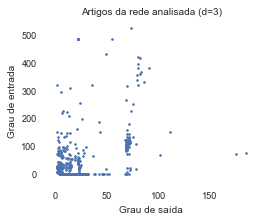

In [212]:
import matplotlib.pyplot as plt
fig=plt.figure(1, figsize=(2.6,2), dpi=80, facecolor='white')
ax=fig.add_axes([1,1,1,1], facecolor='w')
ax.scatter(x=df['out_degree'], y=df['in_degree'], color='b', s=1.8)
plt.title("Artigos da rede analisada (d=3)")
plt.ylabel("Grau de entrada")
plt.xlabel("Grau de saída")
plt.plot()
plt.show()

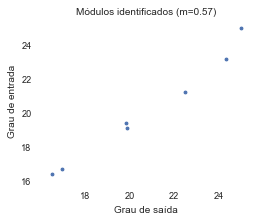

In [210]:
import matplotlib.pyplot as plt
fig=plt.figure(1, figsize=(2.6,2), dpi=80, facecolor='white')
ax=fig.add_axes([1,1,1,1], facecolor='w')
ax.scatter(x=df_modules['out_degree'], y=df_modules['in_degree'], color='b', s=6)
plt.title("Módulos identificados (m=0.57)")
plt.ylabel("Grau de entrada")
plt.xlabel("Grau de saída")
plt.plot()
plt.show()